<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Backpropagation Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Implement a 3 input, 4 node hidden-layer, 1 output node Multilayer Perceptron on the following dataset:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 0  | 0  | 1  | 0 |
| 0  | 1  | 1  | 1 |
| 1  | 0  | 1  | 1 |
| 0  | 1  | 0  | 1 |
| 1  | 0  | 0  | 1 |
| 1  | 1  | 1  | 0 |
| 0  | 0  | 0  | 0 |

If you look at the data you'll notice that the first two columns behave like an XOR gate while the last column is mostly just noise. Remember that creating an XOR gate was what the perceptron was criticized for not being able to learn. 

In [1]:
##### Your Code Here #####
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(42)

# Create Perceptron class that has imput, hidden. and output layers
class SkyNet(object):
    def __init__(self, inputs=3, hidden=4, output=1, n_iter=1000):
        self.input = inputs
        self.hidden = hidden
        self.output = output
        self.n_iter = n_iter
        
        # Initialize random weights
        self.weight1 = np.random.rand(inputs, hidden) / np.sqrt(inputs)
        self.weight2 = np.random.rand(hidden, output) / np.sqrt(hidden)
        
        # Initialize bias
        self.bias1 = np.zeros(hidden)
        self.bias2 = np.zeros(output)
        
        # Initialize loss function list
        self.loss = []
        
    # Define sigmoid function
    def sigmoid(self, x):
        """Sigmoid function"""
        
        return 1 / (1 + np.exp(-x))
    
    # Sigmoid derivative fucntion
    def sigmoid_derivative(self, x):
        """Sigmoid derivative"""
        
        sx = self.sigmoid(x)
        return sx * (1-sx)
    
    # Defien neural network affine function
    def affine_func(self, x, w, b):
        """y = Wx + b"""
        scores = x.dot(w) + b
        cache = (x, w, b)
        return scores, cache
    
    # Defien back-propagaton (affine backwards - not actual backpropagation)
    def back_prop(self, d_out, cache):
        """dY"""
        
        x, w, b = cache
        dx = d_out.dot(w.T) # reshaping for usability
        dw = x.T.dot(d_out)
        db = np.sum(d_out, axis=0)
        
        return dx, dw, db
    
    def fit(self, x, y):
        """Fit the network"""
        for i in range(self.n_iter):
            
            #forward prop (cache to "store" values in memory)
            
            alpha1, cache1 = self.affine_func(x, self.weight1, self.bias1)
            out1 = self.sigmoid(alpha1)
            alpha2, cache2 = self.affine_func(out1, self.weight2, self.bias2)
            
            # Scoring
            out2 = self.sigmoid(alpha2)
            loss = y - out2
            self.loss.append(np.sqrt(np.sum(loss**2)))
            
            # Back prop
            dalpha2 = loss * self.sigmoid_derivative(out2)
            dout2, dW2, db2 = self.back_prop(dalpha2, cache2)
            dalpha1 = dout2 * self.sigmoid_derivative(out1)
            _, dW1, db1 = self.back_prop(dalpha1, cache1)
            
            # gradient update
            self.weight1 += dW1
            self.bias1 += db1
            self.weight2 += dW2
            self.bias2 += db2
            
    def predict(self, x):
        """Make prediction"""
        x = np.array(x)
        a1, _ = self.affine_func(x.reshape(1, -1), self.weight1, self.bias1)
        out1 = self.sigmoid(a1)
        scores = self.affine_func(out1, self.weight2, self.bias2)
        out = self.sigmoid(scores[0])
        return out
            
               

In [2]:
X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [0,1,0],
    [1,0,0],
    [1,1,1],
    [0,0,0]
])

y = np.array([[0], [1], [1], [1], [1], [0], [0]])

print(X.shape, y.shape)

(7, 3) (7, 1)


In [3]:
nn = SkyNet(inputs=3, hidden=4, output=1, n_iter=10000)
nn.fit(X, y)

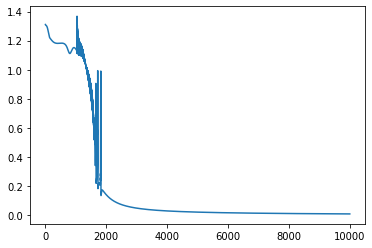

In [4]:
# Plot loss function 
plt.plot(np.array(nn.loss));

In [5]:
test1 = np.array([0,0,1])
test2 = np.array([0,1,1])
test3 = np.array([1,0,1])
test4 = np.array([0,1,0])
test5 = np.array([1,0,0])
test6 = np.array([1,1,1])
test7 = np.array([0,0,0])
print("{}".format(test1), nn.predict(test1))
print("{}".format(test2), nn.predict(test2))
print("{}".format(test3), nn.predict(test3))
print("{}".format(test4), nn.predict(test4))
print("{}".format(test5), nn.predict(test5))
print("{}".format(test6), nn.predict(test6))
print("{}".format(test7), nn.predict(test7))
print(y)

[0 0 1] [[0.00244952]]
[0 1 1] [[0.99544357]]
[1 0 1] [[0.9953884]]
[0 1 0] [[0.99851026]]
[1 0 0] [[0.9986424]]
[1 1 1] [[0.00510421]]
[0 0 0] [[0.00217923]]
[[0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]


In [6]:
class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 3
        self.hiddenNodes = 3
        self.outputNodes = 1

        # Initial Weights
        # 2x3 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 3x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = X.dot(self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = self.activated_hidden.dot(self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, loss, y, y_pred):
        #error in output
        
        self.o_error = y - y_pred
        
        # Apply derivative of sigmoid to error
        # How far off are we in relation to the sigmoid f(x) of the output
        
        self.o_delta = self.o_error * self.sigmoidPrime(y_pred)
        
        # 2 error
        self.t2_error = self.o_delta.dot(self.weights2.T)
        # How much of that fat off can be explained by the gidden -> output weights
        self.t2_delta = self.t2_error * self.sigmoidPrime(self.activated_hidden)
        
        self.weights1 += X.T.dot(self.t2_delta)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        
    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X, y , o)
        

In [7]:
nn = NeuralNetwork()

# Number of Epoche/Iterations
for i in range(1000):
    if (i+1 in [1,2,3,4,5] or ((i+1) % 100 ==0)):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'* 3 + '+')
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X, y)

+---------EPOCH 1---------+
Loss: 
 0.26332539948632344
+---------EPOCH 2---------+
Loss: 
 0.25208464519894275
+---------EPOCH 3---------+
Loss: 
 0.24694071343093818
+---------EPOCH 4---------+
Loss: 
 0.245066181972683
+---------EPOCH 5---------+
Loss: 
 0.244431011812888
+---------EPOCH 100---------+
Loss: 
 0.19352927840741785
+---------EPOCH 200---------+
Loss: 
 0.11707688464267625
+---------EPOCH 300---------+
Loss: 
 0.03575684338477819
+---------EPOCH 400---------+
Loss: 
 0.0143871802050858
+---------EPOCH 500---------+
Loss: 
 0.008965720594379825
+---------EPOCH 600---------+
Loss: 
 0.006540358131057419
+---------EPOCH 700---------+
Loss: 
 0.005160230086726532
+---------EPOCH 800---------+
Loss: 
 0.004266577072980579
+---------EPOCH 900---------+
Loss: 
 0.0036393993669423955
+---------EPOCH 1000---------+
Loss: 
 0.0031743316540621797


## Try building/training a more complex MLP on a bigger dataset.

Use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) to build the cannonical handwriting digit recognizer and see what kind of accuracy you can achieve. 

If you need inspiration, the internet is chalk-full of tutorials, but I want you to see how far you can get on your own first. I've linked to the original MNIST dataset above but it will probably be easier to download data through a neural network library. If you reference outside resources make sure you understand every line of code that you're using from other sources, and share with your fellow students helpful resources that you find.


### Parts
1. Gathering & Transforming the Data
2. Making MNIST a Binary Problem
3. Estimating your Neural Network (the part you focus on)

### Gathering the Data 

`keras` has a handy method to pull the mnist dataset for you. You'll notice that each observation is a 28x28 arrary which represents an image. Although most Neural Network frameworks can handle higher dimensional data, that is more overhead than necessary for us. We need to flatten the image to one long row which will be 784 values (28X28). Basically, you will be appending each row to one another to make on really long row. 

In [10]:
pip install tensorflow 

     |████████████████████████████████| 102.7MB 358kB/s  eta 0:00:01    |████████████████████████████▊   | 92.1MB 20.5MB/s eta 0:00:01
     |████████████████████████████████| 450kB 29.5MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 23.6MB/s eta 0:00:01
     |████████████████████████████████| 2.3MB 17.9MB/s eta 0:00:01
     |████████████████████████████████| 71kB 16.9MB/s eta 0:00:01
     |████████████████████████████████| 112kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 51kB 956kB/s eta 0:00:011
     |████████████████████████████████| 51kB 2.4MB/s eta 0:00:011
     |████████████████████████████████| 61kB 2.3MB/s eta 0:00:011
     |████████████████████████████████| 1.4MB 1.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 36.0MB/s eta 0:00:01
     |████████████████████████████████| 92kB 3.1MB/s eta 0:00:011
     |████████████████████████████████| 133kB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 81kB 2.8MB/s eta 0:00:011


     |████████████████████████████████| 153kB 672kB/s eta 0:00:01
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=80beeef177f9a8543539e25826e3624c5a5873153ca383c61dbcd7cbb75e15d4
  Stored in directory: /Users/norashakirova/Library/Caches/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=75ccb3ced39ea81b988d00e71d8a4cc43b669607e218bae3c10dd22b59723c1a
  Stored in directory: /Users/norashakirova/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp37-none-any.whl size=61682 sha256=9848f456afffc168169159aa36349873b9f78742110002d8968e52ac9e78c4fb
  Stored in directory: /Users/norashakirova/Library/Caches/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Created wheel for absl-py: filename=absl_py-0.8.1-cp37-none-any.whl size=121167 s

In [11]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [12]:
# input image dimensions
img_rows, img_cols = 28, 28

In [13]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [14]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [15]:
# Now the data should be in a format you're more familiar with
x_train.shape

(60000, 784)

### Making MNIST a Binary Problem 
MNIST is multiclass classification problem; however we haven't covered all the necessary techniques to handle this yet. You would need to one-hot encode the target, use a different loss metric, and use softmax activations for the last layer. This is all stuff we'll cover later this week, but let us simply the problem for now: Zero or all else.

In [16]:
import numpy as np

y_temp = np.zeros(y_train.shape)
y_temp[np.where(y_train == 0.0)[0]] = 1
y_train = y_temp

y_temp = np.zeros(y_test.shape)
y_temp[np.where(y_test == 0.0)[0]] = 1
y_test = y_temp

In [17]:
# A Nice Binary target for ya to work with
y_train

array([0., 1., 0., ..., 0., 0., 0.])

### Estimating Your `net

In [22]:
##### Your Code Here #####

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define keras model
model = Sequential() # Sequential model is a linear stack of layers

model.add(Dense(32, input_dim=784, activation='relu')) #Dense - one of keras core layers (along with 
                                                      #Dropout, Activation & flatten)
model.add(Dense(1, activation='sigmoid'))

# Complie the keras model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the keras model
model.fit(x_train, y_train, epochs=150, batch_size=128, verbose=False)
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy: 99.77


## Stretch Goals: 

- Make MNIST a multiclass problem using cross entropy & soft-max
- Implement Cross Validation model evaluation on your MNIST implementation 
- Research different [Gradient Descent Based Optimizers](https://keras.io/optimizers/)
 - [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- Build a housing price estimation model using a neural network. How does its accuracy compare with the regression models that we fit earlier on in class?